# QnA Chatbot 

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [4]:
type(train_data)

list

In [5]:
print(train_data[1])

(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.'], ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'], 'no')


In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [10]:
train_data[0][2]

'no'

##  Creating a Vocabulary of all words

In [11]:
all_data = train_data + test_data

In [12]:
vocab = set()

In [13]:
type(vocab)

set

In [14]:
for words in all_data:
    vocab = vocab.union(set(words[0]))
    vocab = vocab.union(set(words[1]))

In [15]:
vocab = vocab.union(set(['yes','no']))

In [16]:
len(vocab)

37

In [17]:
print(vocab)

{'Mary', 'the', 'back', 'discarded', 'Daniel', 'there', 'to', 'office', 'football', 'no', 'got', 'went', 'up', 'Sandra', 'journeyed', 'took', 'yes', '?', 'bathroom', 'in', 'travelled', 'milk', 'down', 'grabbed', 'Is', 'dropped', 'John', 'moved', 'garden', 'apple', 'put', '.', 'kitchen', 'picked', 'hallway', 'bedroom', 'left'}


In [18]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

In [19]:
# Max lenth of a story
all_story_len = [len(data[0]) for data in all_data]

In [20]:
max_story_len = max(all_story_len)
print(max_story_len)

156


In [21]:
max_question_len = max([len(data[1]) for data in all_data])

In [22]:
max_question_len

6

## Vectorizing the data

In [23]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(filters=[])

In [25]:
tokenizer.fit_on_texts(vocab)

In [26]:
tokenizer.word_index

{'mary': 1,
 'the': 2,
 'back': 3,
 'discarded': 4,
 'daniel': 5,
 'there': 6,
 'to': 7,
 'office': 8,
 'football': 9,
 'no': 10,
 'got': 11,
 'went': 12,
 'up': 13,
 'sandra': 14,
 'journeyed': 15,
 'took': 16,
 'yes': 17,
 '?': 18,
 'bathroom': 19,
 'in': 20,
 'travelled': 21,
 'milk': 22,
 'down': 23,
 'grabbed': 24,
 'is': 25,
 'dropped': 26,
 'john': 27,
 'moved': 28,
 'garden': 29,
 'apple': 30,
 'put': 31,
 '.': 32,
 'kitchen': 33,
 'picked': 34,
 'hallway': 35,
 'bedroom': 36,
 'left': 37}

In [27]:
train_story_text = []
train_question_text = []
train_answers_text = []
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers_text.append(answer)

In [28]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [29]:
train_story_seq[0]

[1, 28, 7, 2, 19, 32, 14, 15, 7, 2, 36, 32]

In [30]:
def vectorize(data,max_story_len=max_story_len,max_question_len=max_question_len):
    story_text = []
    question_text = []
    answers_text = []
    
    for story,question,answer in data:
        story_text.append(story)
        question_text.append(question)
        answer_array = np.zeros(len(vocab) + 1)
        answer_array[tokenizer.word_index[answer]] = 1
        answers_text.append(answer_array)
        
    story_seq = tokenizer.texts_to_sequences(story_text)
    query_seq = tokenizer.texts_to_sequences(question_text)
    
    # Padding the sequences 
    return (pad_sequences(story_seq, maxlen=max_story_len),pad_sequences(query_seq, maxlen=max_question_len),np.array(answers_text))

In [31]:
inputs_train, queries_train, answers_train = vectorize(train_data)

In [32]:
inputs_test, queries_test, answers_test = vectorize(test_data)

In [33]:
inputs_train

array([[ 0,  0,  0, ...,  2, 36, 32],
       [ 0,  0,  0, ...,  2, 35, 32],
       [ 0,  0,  0, ...,  2, 19, 32],
       ...,
       [ 0,  0,  0, ...,  2, 36, 32],
       [ 0,  0,  0, ..., 22,  6, 32],
       [ 0,  0,  0, ..., 30,  6, 32]])

In [34]:
queries_train

array([[25, 14, 20,  2, 35, 18],
       [25,  5, 20,  2, 19, 18],
       [25,  5, 20,  2,  8, 18],
       ...,
       [25, 14, 20,  2, 35, 18],
       [25,  1, 20,  2, 33, 18],
       [25,  1, 20,  2, 36, 18]])

In [35]:
inputs_test

array([[ 0,  0,  0, ...,  2, 36, 32],
       [ 0,  0,  0, ...,  2, 29, 32],
       [ 0,  0,  0, ...,  2, 29, 32],
       ...,
       [ 0,  0,  0, ...,  2, 30, 32],
       [ 0,  0,  0, ...,  2, 29, 32],
       [ 0,  0,  0, ..., 30,  6, 32]])

In [36]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
tokenizer.word_index['no']

10

In [38]:
answers_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [39]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,
         0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

## Creating the Model

In [40]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

In [41]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

### Building the Networks

The setup of neural network we'll use is chosen from this paper

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

## Encoders

### Input Encoder m

In [42]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

### Input Encoder c

In [43]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

### Question Encoder

In [44]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

### Encode the Sequences

In [45]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [46]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [47]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [48]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [49]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [50]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [51]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [52]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [54]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 29s 16ms/step - loss: 1.2026 - accuracy: 0.4940 - val_loss: 0.6949 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 3s 11ms/step - loss: 0.7078 - accuracy: 0.4958 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 3s 11ms/step - loss: 0.6953 - accuracy: 0.5066 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 4s 12ms/step - loss: 0.6961 - accuracy: 0.4956 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 4s 11ms/step - loss: 0.6948 - accuracy: 0.4889 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 3s 11ms/step - loss: 0.6942 - accuracy: 0.5085 - val_loss: 0.6955 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 3s 11ms/step - loss: 0.6951 - accuracy: 0.4889 - val_loss: 0.6936 - val_accuracy

313/313 [==============================] - 4s 12ms/step - loss: 0.2855 - accuracy: 0.8764 - val_loss: 0.3495 - val_accuracy: 0.8390
Epoch 58/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2855 - accuracy: 0.8741 - val_loss: 0.3714 - val_accuracy: 0.8300
Epoch 59/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2742 - accuracy: 0.8795 - val_loss: 0.3393 - val_accuracy: 0.8420
Epoch 60/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2847 - accuracy: 0.8760 - val_loss: 0.3488 - val_accuracy: 0.8370
Epoch 61/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2754 - accuracy: 0.8809 - val_loss: 0.3761 - val_accuracy: 0.8340
Epoch 62/120
313/313 [==============================] - 3s 11ms/step - loss: 0.2766 - accuracy: 0.8793 - val_loss: 0.3602 - val_accuracy: 0.8340
Epoch 63/120
313/313 [==============================] - 3s 11ms/step - loss: 0.2747 - accuracy: 0.8850 - val_loss: 0.3724 - val_accuracy: 0.831

313/313 [==============================] - 4s 13ms/step - loss: 0.2074 - accuracy: 0.9081 - val_loss: 0.4790 - val_accuracy: 0.8350
Epoch 114/120
313/313 [==============================] - 4s 12ms/step - loss: 0.1961 - accuracy: 0.9158 - val_loss: 0.4241 - val_accuracy: 0.8400
Epoch 115/120
313/313 [==============================] - 3s 11ms/step - loss: 0.1987 - accuracy: 0.9120 - val_loss: 0.4987 - val_accuracy: 0.8410
Epoch 116/120
313/313 [==============================] - 4s 11ms/step - loss: 0.2084 - accuracy: 0.9110 - val_loss: 0.5386 - val_accuracy: 0.8280
Epoch 117/120
313/313 [==============================] - 3s 11ms/step - loss: 0.2073 - accuracy: 0.9105 - val_loss: 0.4569 - val_accuracy: 0.8340
Epoch 118/120
313/313 [==============================] - 4s 11ms/step - loss: 0.2042 - accuracy: 0.9093 - val_loss: 0.4273 - val_accuracy: 0.8360
Epoch 119/120
313/313 [==============================] - 4s 12ms/step - loss: 0.1978 - accuracy: 0.9128 - val_loss: 0.4383 - val_accuracy:

In [55]:
import warnings

In [56]:
warnings.filterwarnings('ignore')
filename = 'mine_chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


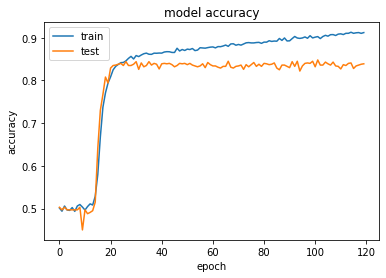

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluating on test set

In [58]:
model.load_weights(filename)

In [59]:
pred_results = model.predict(([inputs_test, queries_test]))

In [60]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

### True answer of first question is no, based on story

In [61]:
# len(pred_results[0])
pred_results[0]

array([1.48960835e-17, 1.54994655e-17, 1.50033540e-17, 1.72705336e-17,
       1.40081564e-17, 1.53353793e-17, 1.24488978e-17, 1.44065299e-17,
       1.81178759e-17, 1.58962872e-17, 9.99996662e-01, 1.41005327e-17,
       1.85367784e-17, 1.41293367e-17, 1.24361774e-17, 1.62973589e-17,
       1.41157081e-17, 3.33792786e-06, 1.59397638e-17, 1.65679678e-17,
       1.50237440e-17, 1.67769549e-17, 1.42029393e-17, 1.64855690e-17,
       1.52580032e-17, 1.40460942e-17, 1.73469932e-17, 1.44944526e-17,
       1.37631249e-17, 1.61732471e-17, 1.26881855e-17, 1.33968451e-17,
       1.53739789e-17, 1.57904593e-17, 1.54532972e-17, 1.37749957e-17,
       1.54985787e-17, 1.46444006e-17], dtype=float32)

In [62]:
pred_results[0].argmax()

10

In [63]:
tokenizer.word_index['no']

10

In [64]:
for word in vocab:
    word = word.lower()
    if tokenizer.word_index[word]==pred_results[0].argmax():
        print("Predicted Answer is " +"'"+str(word)+"'")
        print('Probability of certainity is ' + str(pred_results[0].max()))

Predicted Answer is 'no'
Probability of certainity is 0.99999666


## Writing our own stories

In [65]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [66]:
my_story = 'Mary moved to garden . Daniel put milk in kitchen .'

In [67]:
my_query = 'Is Milk in the kitchen ?'

In [68]:
my_ans = 'yes'

In [69]:
my_testing = [(my_story.split(),my_query.split(),my_ans)]

In [70]:
my_story,my_ques,my_ans = vectorize(my_testing)

In [71]:
pred_results = model.predict(([my_story, my_ques]))

In [72]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.89285517
